In [2]:
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
import warnings
warnings.filterwarnings('ignore')

from geopy.geocoders import Nominatim


In [3]:
pip install geopy

In [4]:
data=pd.read_csv(r'C:\Users\mustafayevavb\Desktop\Data Coders\Lesson Codes\olympics.csv') 

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [6]:
print(data)

                                                0         1     2     3     4  \
0                                             NaN  № Summer  01 !  02 !  03 !   
1                               Afghanistan (AFG)        13     0     0     2   
2                                   Algeria (ALG)        12     5     2     8   
3                                 Argentina (ARG)        23    18    24    28   
4                                   Armenia (ARM)         5     1     2     9   
5                         Australasia (ANZ) [ANZ]         2     3     4     5   
6                       Australia (AUS) [AUS] [Z]        25   139   152   177   
7                                   Austria (AUT)        26    18    33    35   
8                                Azerbaijan (AZE)         5     6     5    15   
9                                   Bahamas (BAH)        15     5     2     5   
10                                  Bahrain (BRN)         8     0     0     1   
11                          

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       147 non-null    object
 1   1       148 non-null    object
 2   2       148 non-null    object
 3   3       148 non-null    object
 4   4       148 non-null    object
 5   5       148 non-null    object
 6   6       148 non-null    object
 7   7       148 non-null    object
 8   8       148 non-null    object
 9   9       148 non-null    object
 10  10      148 non-null    object
 11  11      148 non-null    object
 12  12      148 non-null    object
 13  13      148 non-null    object
 14  14      148 non-null    object
 15  15      148 non-null    object
dtypes: object(16)
memory usage: 18.6+ KB


In [8]:
data.shape

(148, 16)

In [9]:
# Sutunlarin silinmesi 
# data.drop("14", axis=1, inplace=True)

In [10]:
# Birinci setr header
# data.columns = data.iloc[0] 
# data = data[1:]

In [11]:
# Header-lerin deyishdirilmesi 

headerList = ['Country', 'Summer Games', 'S_Gold', 'S_Silver', 'S_Bronze','Summer Total Medal',
                         'Winter Games', 'W_Gold', 'W_Silver', 'W_Bronze','Winter Total Medal',
              'Total Games', 'Total Gold', 'Total Silver','Total Bronze', 'Combined Total']
  
new_data =data.to_csv("olympics_header.csv", header=headerList, index=False)
new_data = pd.read_csv("olympics_header.csv")


In [27]:
new_data.head()

,Country,Summer Games,S_Gold,S_Silver,S_Bronze,Summer Total Medal,Winter Games,W_Gold,W_Silver,W_Bronze,Winter Total Medal,Total Games,Total Gold,Total Silver,Total Bronze,Combined Total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [28]:
# Drop ilk setr
new_data.drop(data.head(1).index, inplace=True)

In [29]:
new_data.head()

,Country,Summer Games,S_Gold,S_Silver,S_Bronze,Summer Total Medal,Winter Games,W_Gold,W_Silver,W_Bronze,Winter Total Medal,Total Games,Total Gold,Total Silver,Total Bronze,Combined Total
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
6,Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


In [76]:
# Data-da type deyismek birinciden basqa 
data = new_data.astype({col: 'int32' for col in new_data.columns[1:]})

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 2 to 147
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             146 non-null    object
 1   Summer Games        146 non-null    int32 
 2   S_Gold              146 non-null    int32 
 3   S_Silver            146 non-null    int32 
 4   S_Bronze            146 non-null    int32 
 5   Summer Total Medal  146 non-null    int32 
 6   Winter Games        146 non-null    int32 
 7   W_Gold              146 non-null    int32 
 8   W_Silver            146 non-null    int32 
 9   W_Bronze            146 non-null    int32 
 10  Winter Total Medal  146 non-null    int32 
 11  Total Games         146 non-null    int32 
 12  Total Gold          146 non-null    int32 
 13  Total Silver        146 non-null    int32 
 14  Total Bronze        146 non-null    int32 
 15  Combined Total      146 non-null    int32 
dtypes: int32(15), object(1)
me

In [63]:
# Null deyerler
data.isnull().sum()

Country               0
Summer Games          0
S_Gold                0
S_Silver              0
S_Bronze              0
Summer Total Medal    0
Winter Games          0
W_Gold                0
W_Silver              0
W_Bronze              0
Winter Total Medal    0
Total Games           0
Total Gold            0
Total Silver          0
Total Bronze          0
Combined Total        0
dtype: int64

<AxesSubplot:>

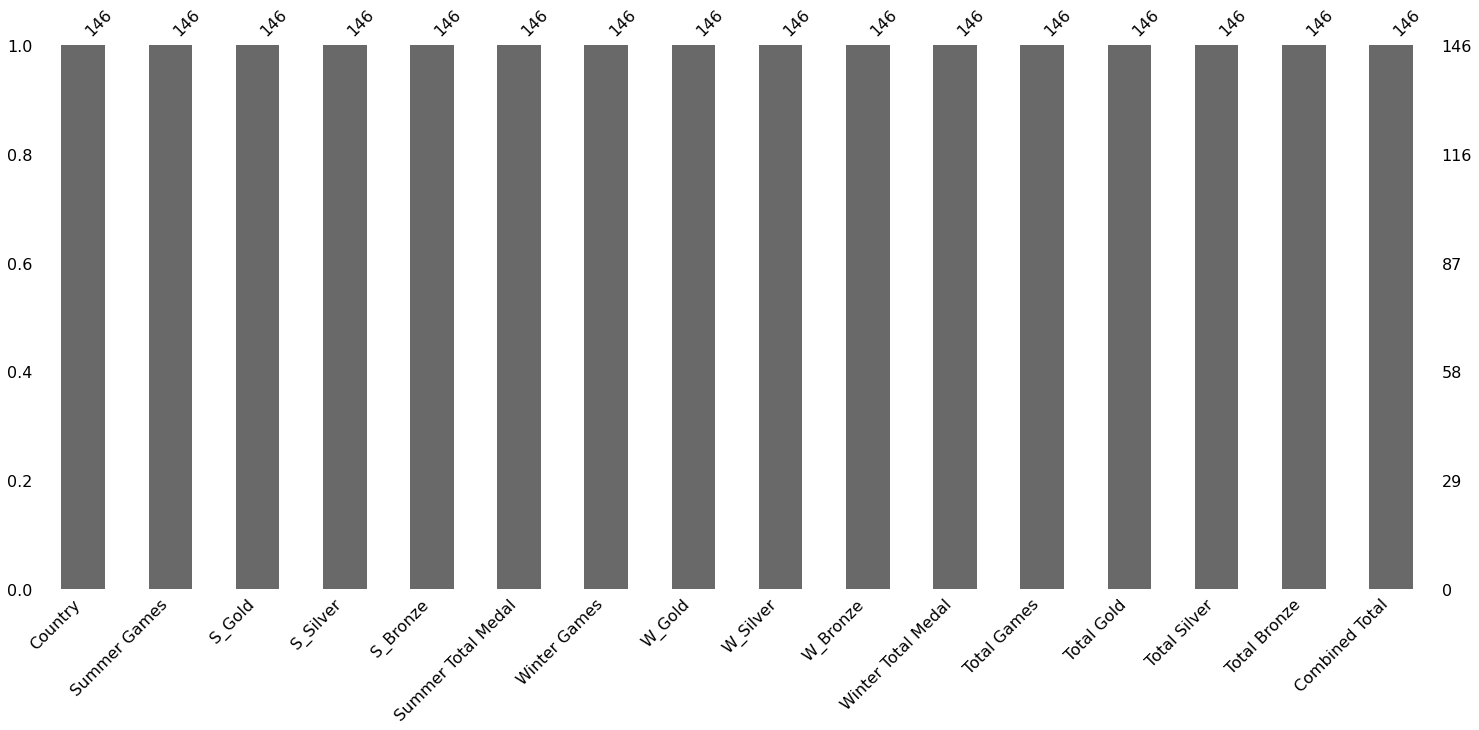

In [64]:
msn.bar(data)

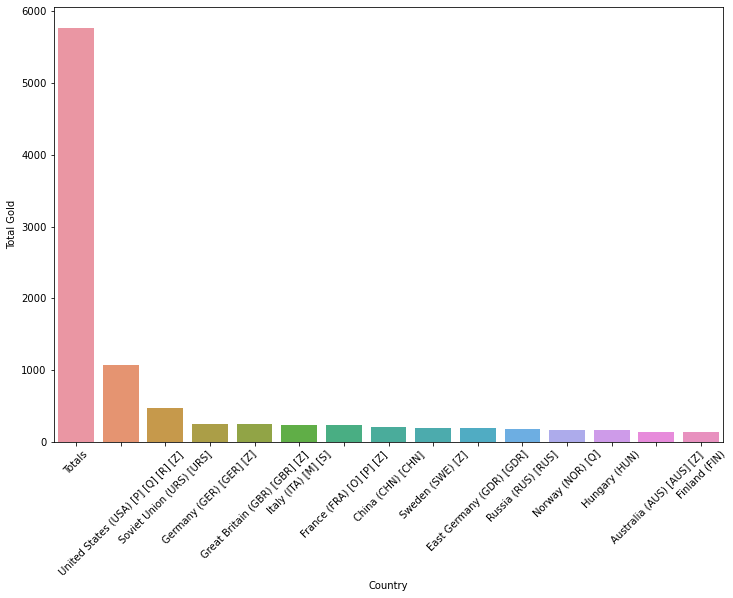

In [65]:
# Hansi olke daha cox qizil medal qazanib
most_gold_country = data.sort_values('Total Gold', ascending = False).head(15)
plt.figure(figsize = (12,8))


sns.barplot(data = most_gold_country, x = 'Country', y = 'Total Gold')
plt.xticks(rotation = 45)
plt.show()

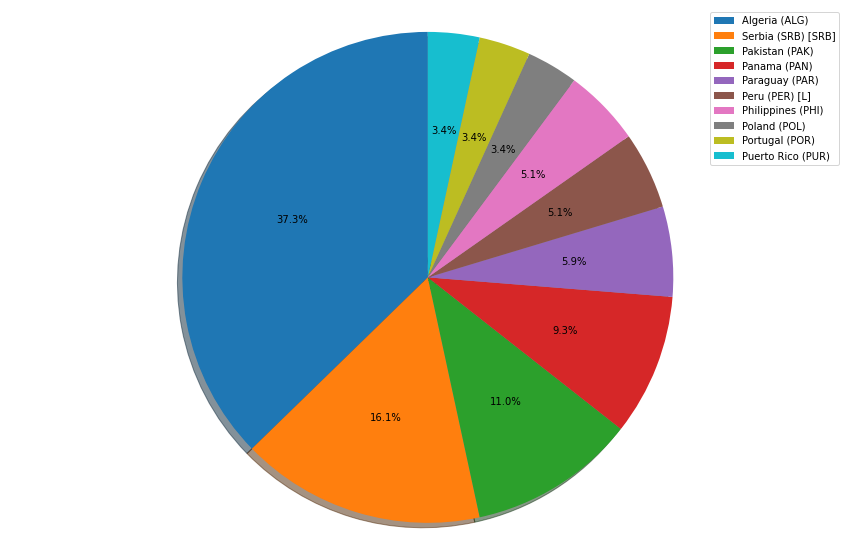

In [66]:
# En cox Winter oyunlarinin kecirildiyi ilk 10 olke 
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax.pie(data['Winter Games'].value_counts()[:10].values, autopct = '%1.1f%%',shadow = True, startangle = 90)

ax.axis('equal')
plt.legend(data['Country'].value_counts().index)
plt.show()

In [77]:
# Olympic oyunlari kecirilen olkelerin xeritede tesviri

countries=data['Country']

def get_gps(countries):
    for country in countries:
        try:
            country = country.split('(')[0].reset_index()
            loc = Nominatim(user_agent="GetLoc")
            getLoc = loc.geocode(country)
            #print (country ,getLoc.latitude)
            data ['Latitude'] = getLoc.latitude
           # data ['Longitude']= getLoc.longitude
        except:
            pass
  
get_gps(countries)


In [78]:
data.head()

,Country,Summer Games,S_Gold,S_Silver,S_Bronze,Summer Total Medal,Winter Games,W_Gold,W_Silver,W_Bronze,Winter Total Medal,Total Games,Total Gold,Total Silver,Total Bronze,Combined Total
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
6,Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


In [54]:

loc = Nominatim(user_agent="GetLoc")
getLoc = loc.geocode('Algeria ')

#print (country ,getLoc.latitude)
data ['Latitude'] = getLoc.latitude
#data ['Longitude']= getLoc.longitude


In [55]:
data.head()

,Country,Summer Games,S_Gold,S_Silver,S_Bronze,Summer Total Medal,Winter Games,W_Gold,W_Silver,W_Bronze,Winter Total Medal,Total Games,Total Gold,Total Silver,Total Bronze,Combined Total,Latitude
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,28.000027
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,28.000027
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,28.000027
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,28.000027
6,Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480,28.000027
